In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, ReLU, BatchNormalization, MaxPool2D, Flatten, Dropout
import matplotlib.pyplot as plt

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar100.load_data(label_mode='fine')

169001437/169001437 [==============================] - 15s 0us/step


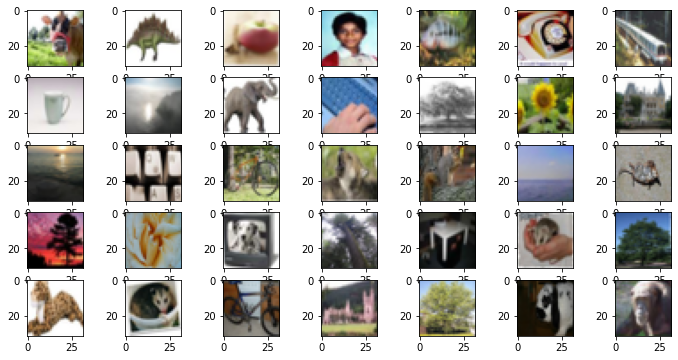

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=7, figsize=(12,6))
a = 0
for i in range(5):
    for j in range(7):
        axes[i, j].imshow(X_train[a])
        a += 1
plt.show()

In [ ]:
X_train, X_test = X_train / 255.0, X_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()


In [ ]:
num_classes = len(set(y_train))

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')


In [ ]:
inputs = X_train.shape[1:]

X_train.shape[1:]

(32, 32, 3)

In [ ]:
# y_train_OH = tf.keras.utils.to_categorical(y_train, num_classes)
# y_valid_OH = tf.keras.utils.to_categorical(y_valid, num_classes)

In [ ]:
# y_train_OH.shape

In [ ]:
inputs = tf.keras.layers.Input(shape=X_train.shape[1:])

layer_1 = Conv2D(256, kernel_size=3, activation='relu', padding="same",
                 kernel_initializer="he_normal")(inputs)

layer_2 = BatchNormalization()(layer_1)

layer_3 = Conv2D(256, kernel_size=3, activation='relu', padding="same",
                 kernel_initializer="he_normal")(layer_2)

layer_4 = BatchNormalization()(layer_3)
layer_5 = MaxPool2D()(layer_4)
layer_6 = Dropout(0.6)(layer_5)






layer_7 = Conv2D(256, kernel_size=3, activation='relu', padding="same",
                  kernel_initializer="he_normal")(layer_6)

layer_8 = BatchNormalization()(layer_7)

layer_9 = Conv2D(256, kernel_size=3, activation='relu', padding="same",
                  kernel_initializer="he_normal")(layer_8)

layer_10 = BatchNormalization()(layer_9)
layer_11 = MaxPool2D()(layer_10)
layer_12 = Dropout(0.6)(layer_11)







layer_13 = Conv2D(256, kernel_size=3, activation='relu', padding="same",
                  kernel_initializer="he_normal")(layer_12)

layer_14 = BatchNormalization()(layer_13)

layer_15 = Conv2D(256, kernel_size=3, activation='relu', padding="same",
                  kernel_initializer="he_normal")(layer_14)

layer_16 = BatchNormalization()(layer_15)
layer_17 = MaxPool2D()(layer_16)
layer_18 = Dropout(0.6)(layer_17)





layer_19 = Flatten()(layer_18)
layer_20 = Dense(128, activation='relu',
                 kernel_initializer="he_normal")(layer_19)
layer_21 = BatchNormalization()(layer_20)
layer_22 = Dropout(0.5)(layer_21)
outputs = Dense(num_classes, activation="softmax")(layer_22)

model = Model(inputs=inputs, outputs=outputs)

In [ ]:
# opt = tf.keras.optimizers.Adam(learning_rate=0.003)

In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=["accuracy"])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 256)       7168      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 256)      1024      
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 256)       590080    
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 256)      1024      
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 256)      0     

In [ ]:

history = model.fit(X_train, y_train, batch_size=64, epochs=200, validation_data=(X_test, y_test))

Epoch 1/200
782/782 [==============================] - 57s 60ms/step - loss: 4.1380 - accuracy: 0.0870 - val_loss: 3.3455 - val_accuracy: 0.1958
Epoch 2/200
782/782 [==============================] - 45s 57ms/step - loss: 3.2704 - accuracy: 0.2037 - val_loss: 2.7767 - val_accuracy: 0.2984
Epoch 3/200
782/782 [==============================] - 45s 58ms/step - loss: 2.7837 - accuracy: 0.2893 - val_loss: 2.3804 - val_accuracy: 0.3767
Epoch 4/200
782/782 [==============================] - 45s 58ms/step - loss: 2.5101 - accuracy: 0.3455 - val_loss: 2.2032 - val_accuracy: 0.4048
Epoch 5/200
782/782 [==============================] - 45s 58ms/step - loss: 2.3093 - accuracy: 0.3893 - val_loss: 1.9704 - val_accuracy: 0.4625
Epoch 6/200
782/782 [==============================] - 46s 58ms/step - loss: 2.1596 - accuracy: 0.4212 - val_loss: 1.9463 - val_accuracy: 0.4684
Epoch 7/200
782/782 [==============================] - 46s 58ms/step - loss: 2.0497 - accuracy: 0.4464 - val_loss: 1.8725 - val_ac

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.3633 - accuracy: 0.9028


[0.36330294609069824, 0.9028000235557556]

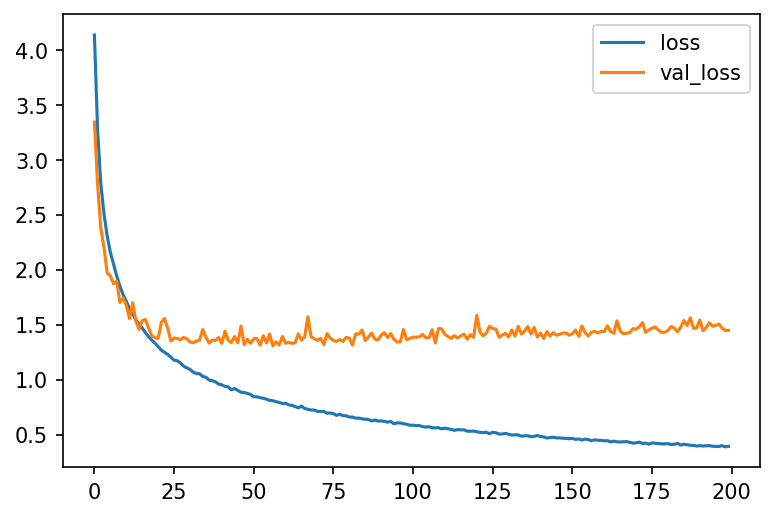

In [ ]:
plt.figure(dpi=150)
# plt.grid()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

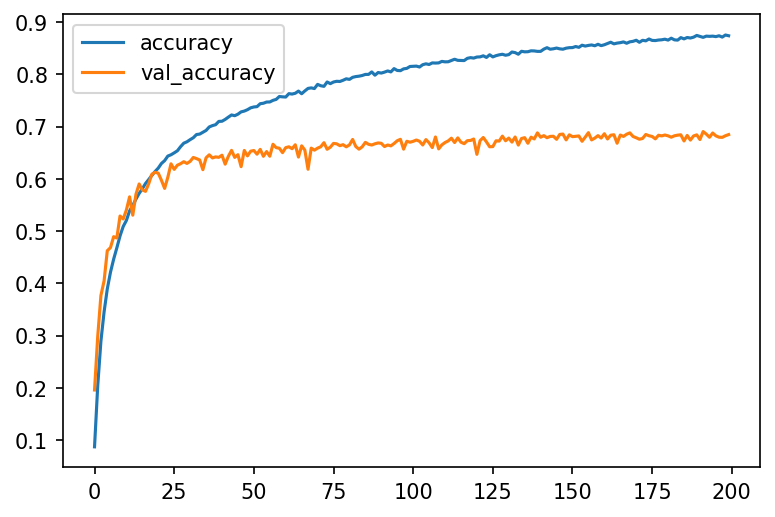

In [ ]:
plt.figure(dpi=150)
# plt.grid()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.show()